In [ ]:
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from librosa.display import waveshow

### Choose audio

In [2]:
audio_path = '../data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav'
x, sr = librosa.load(audio_path)

In [3]:
ipd.Audio(audio_path)

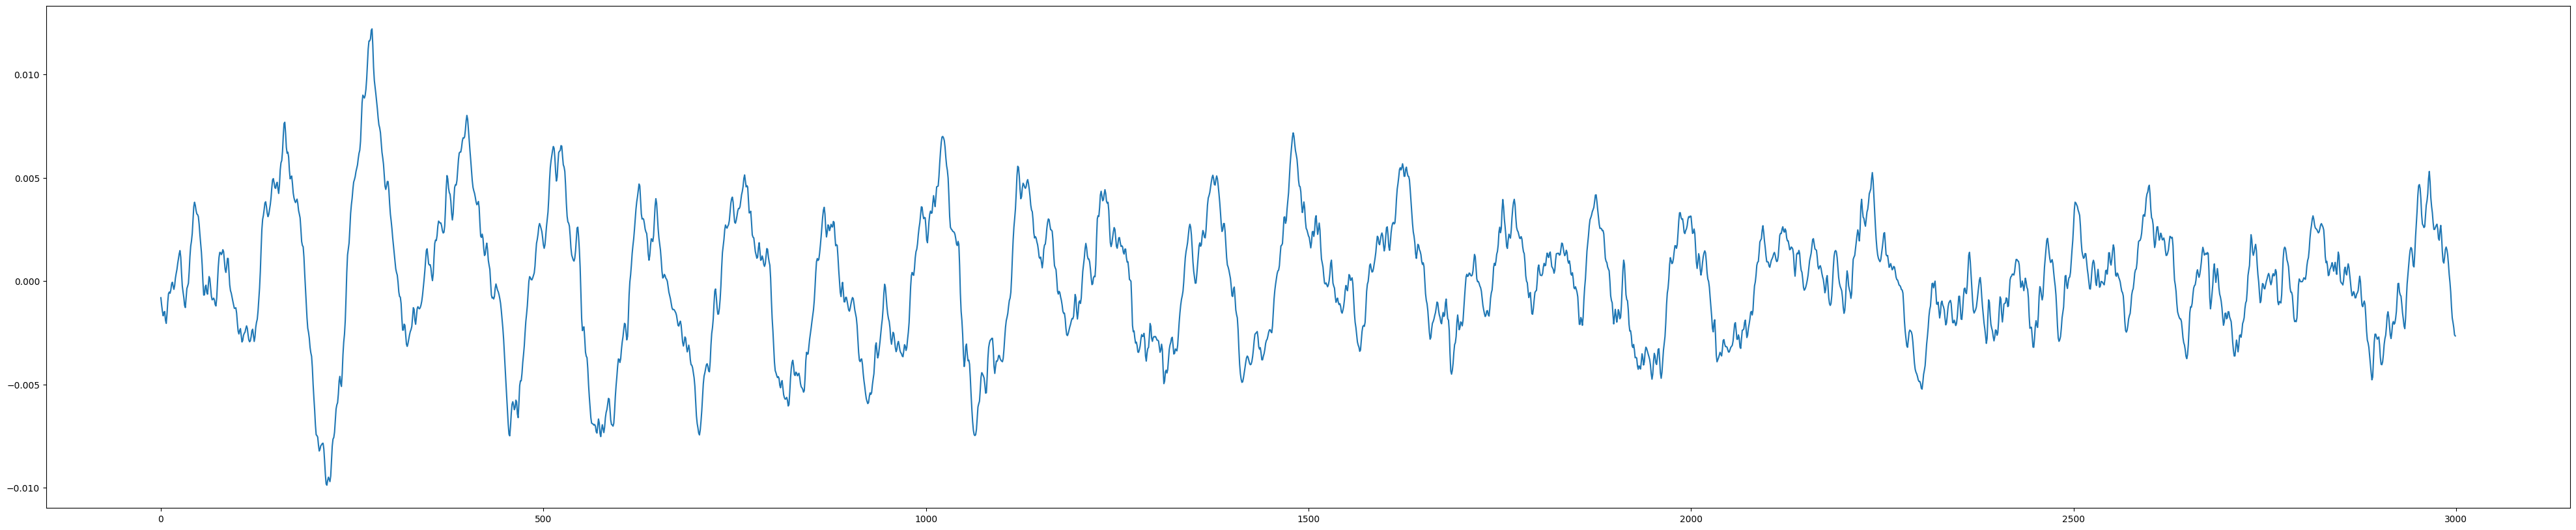

In [4]:
plt.figure(figsize=(50, 10))
plt.plot(x[0:3000])

### Spectral features

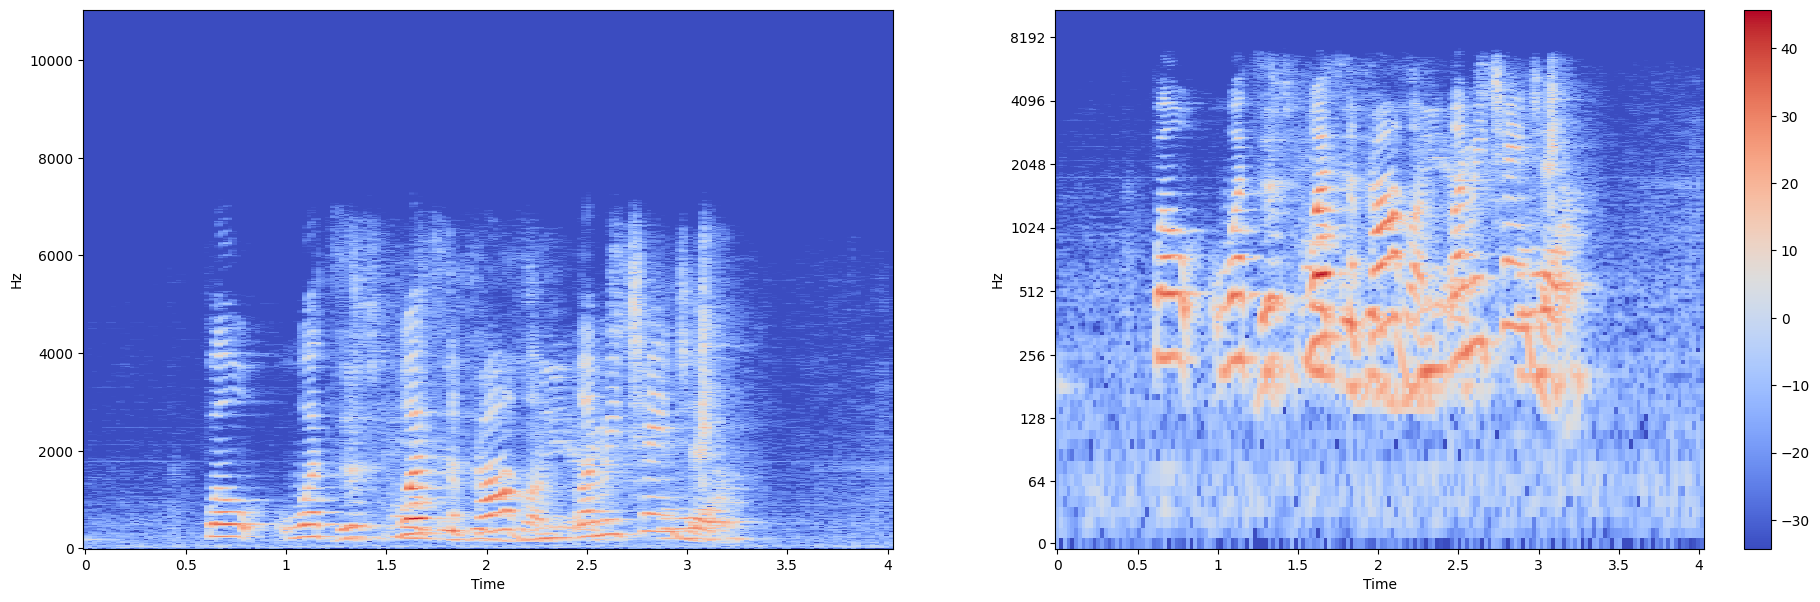

In [5]:
x_fourier = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_fourier))
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.subplot(1, 2, 2)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [6]:
spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

In [7]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]

In [19]:
def plot_normalized(array):
    frames = range(len(array))
    t = librosa.frames_to_time(frames)

    normalized = sklearn.preprocessing.minmax_scale(array, axis=0)

    librosa.display.waveshow(x, sr=sr, alpha=0.8)
    plt.plot(t, normalized, color='r')
    plt.show()

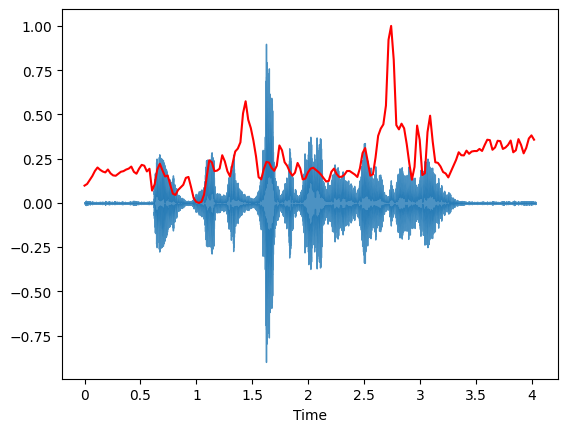

In [20]:
plot_normalized(spectral_centroid)

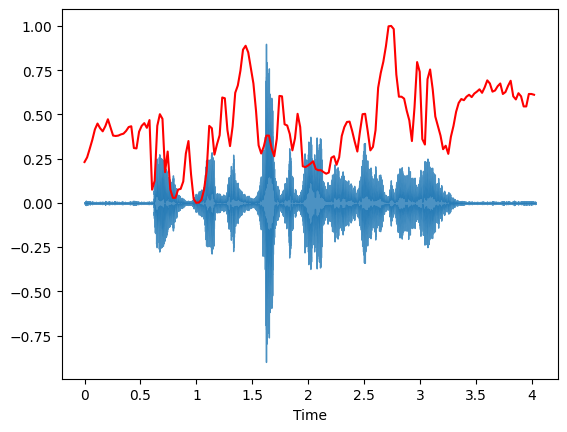

In [21]:
plot_normalized(spectral_rolloff)

(20, 174)


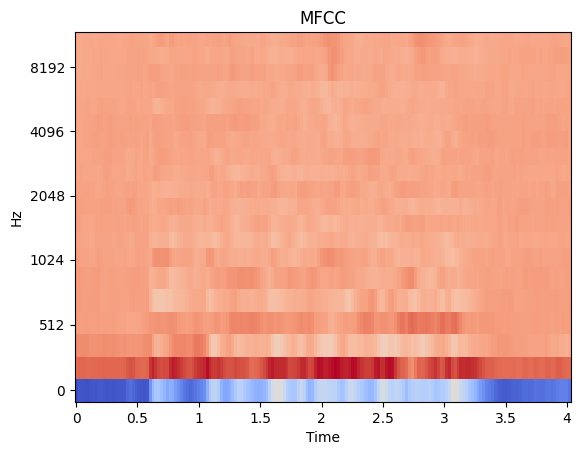

In [22]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.title('MFCC')
librosa.display.specshow(data=mfccs, sr=sr, x_axis='time', y_axis='mel')

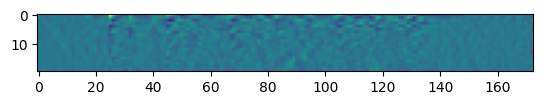

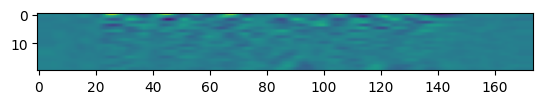

In [23]:
delta = librosa.feature.delta(mfccs)
import numpy as np
plt.imshow(np.diff(mfccs, axis=1))
plt.figure()
plt.imshow(delta)

### Example of unhealthy signal

In [ ]:
audio_path = '../data/unhealthy/155-a_n.wav'
x, sr = librosa.load(audio_path)

In [ ]:
sr

In [ ]:
ipd.Audio(audio_path)

In [ ]:
plt.figure(figsize=(50, 10))
plt.plot(x[0:3000])

In [ ]:
x_fourier = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_fourier))
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.subplot(1, 2, 2)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

In [ ]:
def plot_normalized(array):
    frames = range(len(array))
    t = librosa.frames_to_time(frames)

    normalized = sklearn.preprocessing.minmax_scale(array, axis=0)

    librosa.display.waveplot(x, sr=sr, alpha=0.6)
    plt.plot(t, normalized, color='r')
    plt.show()

In [ ]:
plot_normalized(spectral_centroid)

In [ ]:
plot_normalized(spectral_rolloff)

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel')